# 1. 

In [1]:
# Import public packages.
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi 
from importlib import reload
import pickle
%matplotlib inline

# Import my packages.
import sys
sys.path.append('/Users/MStadler/Bioinformatics/Projects/Zelda/Quarantine_analysis/bin')
import imagep as imp

In [2]:
# Load image stack.
stack = imp.read_tiff_lattice(
    '/Users/MStadler/Bioinformatics/Projects/Zelda/Quarantine_analysis/data/20171207_Zldeve_em1_mv2/', 
    span=(8,36))

TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781

TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781

In [10]:
imp.viewer(imp.gradient_nD(stack[1,1]),'zxy')

interactive(children=(Dropdown(description='Color', index=9, options=('gray', 'prism', 'plasma', 'magma', 'inf…

In [3]:
imp.viewer(stack.max(axis=2),'ctxy')

interactive(children=(Dropdown(description='Color', index=9, options=('gray', 'prism', 'plasma', 'magma', 'inf…

# Segment nuclei:

In [11]:
# Background subtract red from green.
bgsub = imp.stack_bgsub(stack)

In [13]:
# View background-subtracted stack, determine separation between nuclear centers in xy and z.
imp.viewer(bgsub[1,0], 'zxy')
xy_sep = 70
z_sep = 70

interactive(children=(Dropdown(description='Color', index=9, options=('gray', 'prism', 'plasma', 'magma', 'inf…

In [14]:
# Test segmentation on first time frame. 
"""
sigma1: int
    Sigma for initial Gaussian filter, for making initial mask
sigma_dog_small: int
    Smaller sigma for DoG filter used as input to gradient for watershed
sigma_dog_big: int
    Larger sigma for DoG filter used as input to gradient for watershed
seed_window: tuple of three ints
    Size in [z, x, y] for window for determining local maxes in distance
    transform. Generally want size to be ~ size of nuclei.
erosion_length: int
    Size in x and y of structuring element for erosion of initial mask.
dilation_length: int
    Size in x and y of structuring element for dilating objects after
    final segmentation.
size_min: int
    Minimum size, in pixels, of objects to retain
size_max: int
    Maximum size, in pixels, of objects to retain
circularity_min: float
    Minimum circularity measure of objects to retain
"""
sigma1 = 3
sigma_dog_small = 5
sigma_dog_big = 40
seed_window = (z_sep, xy_sep, xy_sep)
erosion_length = 5
dilation_length = 18
size_min = 1e3
size_max = 5e5
circularity_min = 0.5
sensitivity=0
reload(imp);

/Users/MStadler/Bioinformatics/Projects/Zelda/Quarantine_analysis/bin/imagep.py:351: RuntimeWarning: invalid value encountered in sqrt
  gradient = np.sqrt(sumsq)


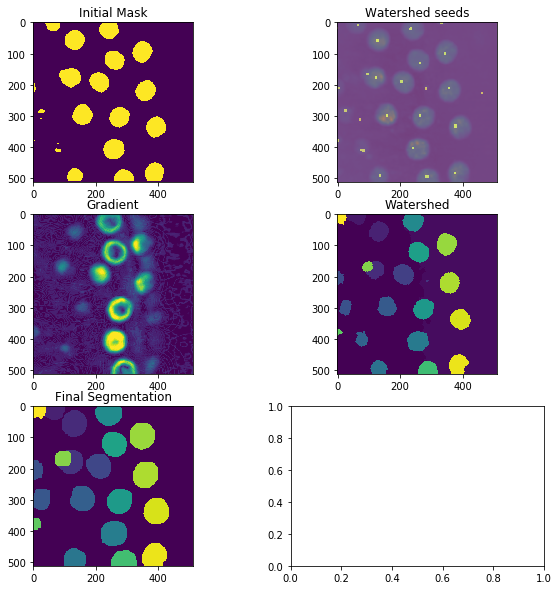

In [15]:
nuc=imp.segment_nuclei3D_5(bgsub[1,4], sigma1=sigma1, sigma_dog_small=sigma_dog_small, sigma_dog_big=sigma_dog_big, 
        seed_window=seed_window, size_min=size_min, size_max=size_max, dilation_length=dilation_length, 
        erosion_length=erosion_length, circularity_min=circularity_min, sensitivity=sensitivity, display=True)

In [54]:
# View in 3D.
imp.viewer([30*nuc2, stack[1,0]], 'zxy')

interactive(children=(Dropdown(description='Color', options=('viridis', 'magma', 'Reds', 'inferno', 'gray', 'p…

In [57]:
# Perform 4D segmentation using parameters from 3D segmentation.
mask = imp.lattice_segment_nuclei_5(bgsub[:,0:3], sigma1=sigma1, sigma_dog_small=sigma_dog_small, sigma_dog_big=sigma_dog_big, 
        seed_window=seed_window, size_min=size_min, size_max=size_max, dilation_length=dilation_length, 
        erosion_length=erosion_length, circularity_min=circularity_min, sensitivity=sensitivity)

1
2


In [ ]:
# View final nuclear segmentation.
imp.viewer([mask*30, stack[1]], 'tzxy')

In [9]:
# Save nuclear mask.
nucmask_file = '/Users/MStadler/Bioinformatics/Projects/Zelda/Quarantine_analysis/results/20171207_Zldeve_em5_mv2_nucmask.pkl'
with open(nucmask_file, 'wb') as file:
    pickle.dump(mask, file)

# Segment spots:

In [76]:
# Segment MS2 spots from stack. Consider testing on a few frames before running whole stack.
spot_data = imp.ms2_segment_stack(stack[:,0:3], mask);

<module 'imagep' from '/Users/MStadler/Bioinformatics/Projects/Zelda/Quarantine_analysis/bin/imagep.py'>

In [77]:
# View results of segmentation.
boxstack_0 = imp.box_spots(stack[0], spot_data, halfwidth_xy=15)
imp.viewer(boxstack_0.max(axis=1),'txy')

interactive(children=(Dropdown(description='Color', options=('viridis', 'magma', 'Reds', 'inferno', 'gray', 'p…

In [78]:
# Save spot segmentation data.
spot_data_file = '/Users/MStadler/Bioinformatics/Projects/Zelda/Quarantine_analysis/results/20171207_Zldeve_em5_mv2_spot_data.pkl'
with open(spot_data_file, 'wb') as file:
    pickle.dump(spot_data, file)